In [3]:
import pandas as pd


In [4]:
train_data=pd.read_csv(r'D:\GUVI2\Data\car_insurance_data\train.csv')
test_data=pd.read_csv(r'D:\GUVI2\Data\car_insurance_data\test.csv')
sample_submission=pd.read_csv(r'D:\GUVI2\Data\car_insurance_data\sample_submission.csv')

In [19]:
train_data.head()


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [73]:
#Creating copies of datasets before transformation

df_train_data=train_data.copy()
df_test_data=test_data.copy()

In [ ]:
# categorical_cols=['area_cluster','make','segment','model','fuel_type','engine_type','rear_brakes_type','transmission_type','steering_type']

# df_train_data=pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
# df_test_data=pd.get_dummies(test_data,columns=categorical_cols, drop_first=True)

In [66]:
bool_cols=['is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera',\
           'is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger','is_brake_assist',\
            'is_power_door_locks','is_central_locking','is_power_steering','is_driver_seat_height_adjustable',\
                'is_day_night_rear_view_mirror','is_ecw','is_speed_alert']
for col in bool_cols:
    if col in df_train_data.columns:

        df_train_data[col]=df_train_data[col].map({'Yes':1,'No':0})
        df_test_data[col]=df_test_data[col].map({'Yes':1,'No':0})

In [67]:
import pandas as pd

# List of categorical columns (can be numeric or string)
categorical_cols = ['area_cluster','make','segment','model','fuel_type',
                    'engine_type','rear_brakes_type','transmission_type','steering_type']

# One-hot encode train data numerically
df_train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

# One-hot encode test data
df_test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

# Align test data columns with train data
df_test_data = df_test_data.reindex(columns=df_train_data.columns, fill_value=0)


In [74]:
import pandas as pd

# Step 1: Create copies
df_train_data = train_data.copy()
df_test_data = test_data.copy()

# Step 2: Convert Yes/No columns to 0/1
bool_cols = [
    'is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera',
    'is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger','is_brake_assist',
    'is_power_door_locks','is_central_locking','is_power_steering','is_driver_seat_height_adjustable',
    'is_day_night_rear_view_mirror','is_ecw','is_speed_alert'
]

for col in bool_cols:
    if col in df_train_data.columns:
        df_train_data[col] = df_train_data[col].map({'Yes': 1, 'No': 0})
        df_test_data[col] = df_test_data[col].map({'Yes': 1, 'No': 0})

# Step 3: One-hot encode categorical columns
categorical_cols = [
    'area_cluster','make','segment','model','fuel_type',
    'engine_type','rear_brakes_type','transmission_type','steering_type'
]

df_train_data = pd.get_dummies(df_train_data, columns=categorical_cols, drop_first=True)
df_test_data = pd.get_dummies(df_test_data, columns=categorical_cols, drop_first=True)

# Step 4: Align test columns with train columns
df_test_data = df_test_data.reindex(columns=df_train_data.columns, fill_value=0)


In [75]:
# Detect all boolean columns automatically
bool_cols = df_train_data.select_dtypes(include='bool').columns.tolist()

# Convert True/False → 1/0
df_train_data[bool_cols] = df_train_data[bool_cols].astype(int)
df_test_data[bool_cols] = df_test_data[bool_cols].astype(int)


In [69]:
train_data['engine_type'].unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

In [77]:
df_train_data['max_power_value']=df_train_data['max_power'].replace(r'([0-9.]+).*',r'\1',regex=True).astype(float)
df_train_data['max_power_rpm']=df_train_data['max_power'].replace(r'.*@([0-9]+).*',r'\1',regex=True).astype(float)


In [78]:
df_train_data['max_torque_value']=df_train_data['max_torque'].replace(r'([0-9.]+).*',r'\1',regex=True).astype(float)
df_train_data['max_torque_rpm']=df_train_data['max_torque'].replace(r'.*@([0-9]+).*',r'\1',regex=True).astype(float)
df_train_data.drop('max_torque', axis=1, inplace=True)
df_test_data.drop('max_torque', axis=1, inplace=True)
df_train_data.drop('max_power', axis=1, inplace=True)
df_test_data.drop('max_power', axis=1, inplace=True)

In [79]:

pd.set_option('display.max_columns', None)
df_train_data.head()


,policy_id,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,make_2,make_3,make_4,make_5,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,max_power_value,max_power_rpm,max_torque_value,max_torque_rpm
0,ID00001,0.515874,0.05,0.644231,4990,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,40.36,6000.0,60.0,3500.0
1,ID00002,0.672619,0.02,0.375000,27003,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,40.36,6000.0,60.0,3500.0
2,ID00003,0.841110,0.02,0.384615,4076,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,40.36,6000.0,60.0,3500.0
3,ID00004,0.900277,0.11,0.432692,21622,2,1,1,0,1,1,1197,4,5,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,88.50,6000.0,113.0,4400.0
4,ID00005,0.596403,0.11,0.634615,34738,2,0,0,0,0,1,999,3,5,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,67.06,5500.0,91.0,4250.0


In [96]:
#Applying Regression models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE

In [81]:
X=df_train_data.drop(['is_claim','policy_id'], axis=1)
Y=df_train_data['is_claim']

In [88]:
x_train,x_val, y_train,y_val=train_test_split(X,Y, test_size=0.1, random_state=42)

In [89]:
#SMOTE
sm=SMOTE(random_state=42)
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)
print(y_train_res.value_counts(normalize=True))


is_claim
0    0.5
1    0.5
Name: proportion, dtype: float64


In [95]:
#Hyperparameter tuning of RF Model
rf_model= RandomForestClassifier(
    random_state=42,
    n_estimators=500,
    max_depth=10,
    min_samples_split=10,
    class_weight='balanced'
        )
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_val)
rf_prob= rf_model.predict_proba(x_val)[:,1]
rf_rocauc=roc_auc_score(y_val, rf_prob)
print("\nROCAUC RF:")
print(rf_rocauc)


ROCAUC RF:
0.650651639460665


Top 20 Features by Importance:

                feature  importance
0         policy_tenure    0.356341
1            age_of_car    0.223809
2   age_of_policyholder    0.150016
3    population_density    0.036363
31     area_cluster_C10    0.009548
16               height    0.009488
51      area_cluster_C9    0.008346
14               length    0.007609
10         displacement    0.007021
89     max_torque_value    0.007011
50      area_cluster_C8    0.006612
87      max_power_value    0.006365
15                width    0.006364
41      area_cluster_C2    0.006294
17         gross_weight    0.005880
45      area_cluster_C3    0.005832
47      area_cluster_C5    0.005827
39     area_cluster_C18    0.005713
35     area_cluster_C14    0.005700
34     area_cluster_C13    0.005501


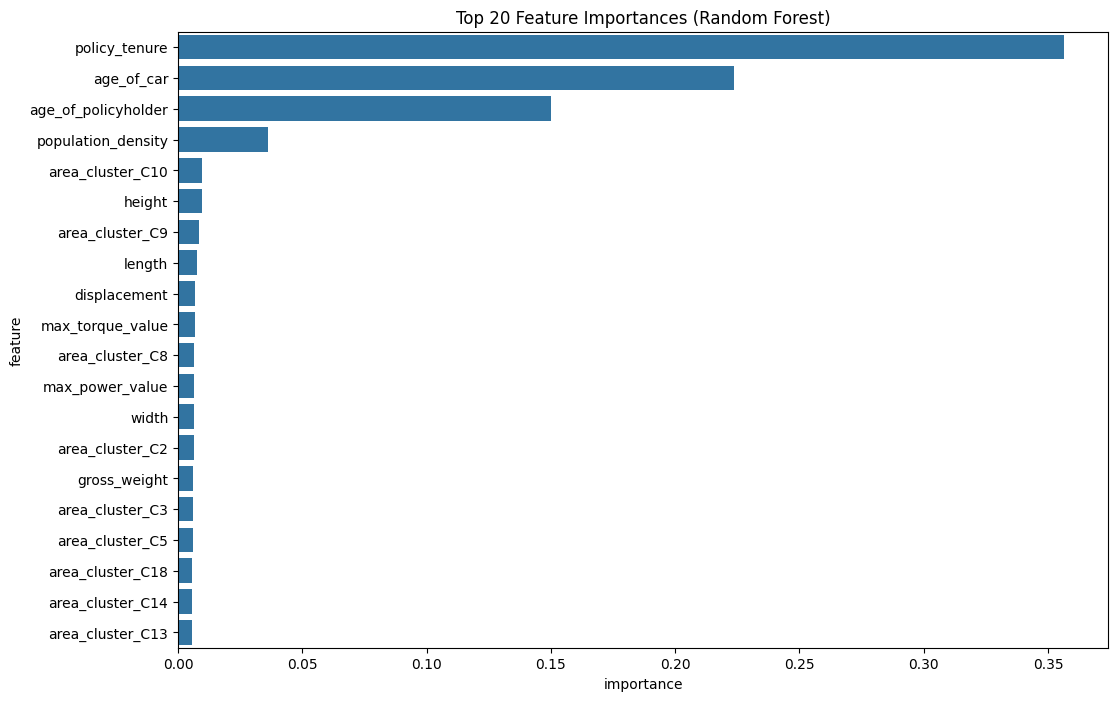

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from trained RF model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

# Display top 20 features
print("Top 20 Features by Importance:\n")
print(feat_imp.head(20))

# Plot top 20 features
plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feat_imp.head(20))
plt.title('Top 20 Feature Importances (Random Forest)')
plt.show()


In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [200, 500, 700],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
roc_scorer = make_scorer(roc_auc_score, needs_proba=True)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=roc_scorer,
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Use all CPUs
    verbose=2
)
grid_search.fit(x_train_res, y_train_res)  # Use SMOTE-resampled train set
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)
best_rf = grid_search.best_estimator_
rf_prob = best_rf.predict_proba(x_val)[:,1]
rf_rocauc = roc_auc_score(y_val, rf_prob)
print("Validation ROC-AUC:", rf_rocauc)



Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

In [97]:
#Logistic Regression
scaler=StandardScaler()
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_res)
x_val_scaled = scaler.transform(x_val)

# --- 1. Logistic Regression ---
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(x_train_scaled, y_train_res)
lr_prob = lr_model.predict_proba(x_val_scaled)[:,1]
lr_pred = lr_model.predict(x_val_scaled)
print("\n--- Logistic Regression ---")
print("ROC-AUC:", roc_auc_score(y_val, lr_prob))
print(classification_report(y_val, lr_pred))



--- Logistic Regression ---
ROC-AUC: 0.584484948964978
              precision    recall  f1-score   support

           0       0.95      0.58      0.72      5481
           1       0.08      0.54      0.14       379

    accuracy                           0.58      5860
   macro avg       0.52      0.56      0.43      5860
weighted avg       0.89      0.58      0.69      5860



In [98]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10)
dt_model.fit(x_train_res, y_train_res)
dt_prob = dt_model.predict_proba(x_val)[:,1]
dt_pred = dt_model.predict(x_val)

print("\n--- Decision Tree ---")
print("ROC-AUC:", roc_auc_score(y_val, dt_prob))
print(classification_report(y_val, dt_pred))


--- Decision Tree ---
ROC-AUC: 0.6174248386967884
              precision    recall  f1-score   support

           0       0.95      0.66      0.78      5481
           1       0.09      0.51      0.16       379

    accuracy                           0.65      5860
   macro avg       0.52      0.59      0.47      5860
weighted avg       0.90      0.65      0.74      5860



In [100]:
# XGBoost
xgb_model = xgb.XGBClassifier(
    random_state=42, 
    n_estimators=500, 
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=(y_train.value_counts()[0]/y_train.value_counts()[1])
)
xgb_model.fit(x_train_res, y_train_res)
xgb_prob = xgb_model.predict_proba(x_val)[:,1]
xgb_pred = xgb_model.predict(x_val)
print("\n--- XGBoost ---")
print("ROC-AUC:", roc_auc_score(y_val, xgb_prob))
print(classification_report(y_val, xgb_pred))


--- XGBoost ---
ROC-AUC: 0.6399018629479916
              precision    recall  f1-score   support

           0       0.96      0.42      0.58      5481
           1       0.08      0.77      0.15       379

    accuracy                           0.44      5860
   macro avg       0.52      0.59      0.37      5860
weighted avg       0.91      0.44      0.55      5860



In [101]:
#LightGBM
lgb_model = lgb.LGBMClassifier(
    random_state=42,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    class_weight='balanced'
)
lgb_model.fit(x_train_res, y_train_res)
lgb_prob = lgb_model.predict_proba(x_val)[:,1]
lgb_pred = lgb_model.predict(x_val)

print("\n--- LightGBM ---")
print("ROC-AUC:", roc_auc_score(y_val, lgb_prob))
print(classification_report(y_val, lgb_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 49363, number of negative: 49363
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3378
[LightGBM] [Info] Number of data points in the train set: 98726, number of used features: 91
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit